Final Project 4 - Clustering

Anggota Kelompok:
* Rivayo Aldoni A - PYTN-KS09-007
* Audi Mayori - PYTN-KS09-011
* Naufal Afif S - PYTN-KS09-015


## Latar Belakang

**Dataset**

Dataset yang digunakan dalam pembuatan model ini bersumber dari https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Dataset ini berisi transaksi pelanggan/pengguna kartu kredit sebanyak 8950 orang selama 6 bulan

**Objective yang ingin dicapai**

* Melakukan clustering pelanggan/pengguna kartu kredit
* Mengetahui jumlah kluster yang optimal untuk segmentasi pelanggan/pengguna kartu kredit

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

import pickle

## Data Loading

In [2]:
df = pd.read_csv('dataset/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [6]:
for col in df.columns:
    print(col,': ', df[col].nunique())

CUST_ID :  8950
BALANCE :  8871
BALANCE_FREQUENCY :  43
PURCHASES :  6203
ONEOFF_PURCHASES :  4014
INSTALLMENTS_PURCHASES :  4452
CASH_ADVANCE :  4323
PURCHASES_FREQUENCY :  47
ONEOFF_PURCHASES_FREQUENCY :  47
PURCHASES_INSTALLMENTS_FREQUENCY :  47
CASH_ADVANCE_FREQUENCY :  54
CASH_ADVANCE_TRX :  65
PURCHASES_TRX :  173
CREDIT_LIMIT :  205
PAYMENTS :  8711
MINIMUM_PAYMENTS :  8636
PRC_FULL_PAYMENT :  47
TENURE :  7


In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Data Cleaning

In [9]:
df.duplicated().sum()

0

**Handle Missing Value**

Melakukan penanganan terhadap missing value yang telah diketahui sebelumnya menggunakan imputasi median

In [10]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

imp1 = df['MINIMUM_PAYMENTS'].values.reshape(-1, 1)
imp2 = df['CREDIT_LIMIT'].values.reshape(-1, 1)

imp1 = imputer.fit_transform(imp1) 
imp2 = imputer.fit_transform(imp2)

df['MINIMUM_PAYMENTS'] = imp1
df['CREDIT_LIMIT'] = imp2

In [11]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Data Exploration

In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397920,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131181,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095789,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050256,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134019,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140747,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006154,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027311,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032055,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.100616,-0.249773,-0.133372


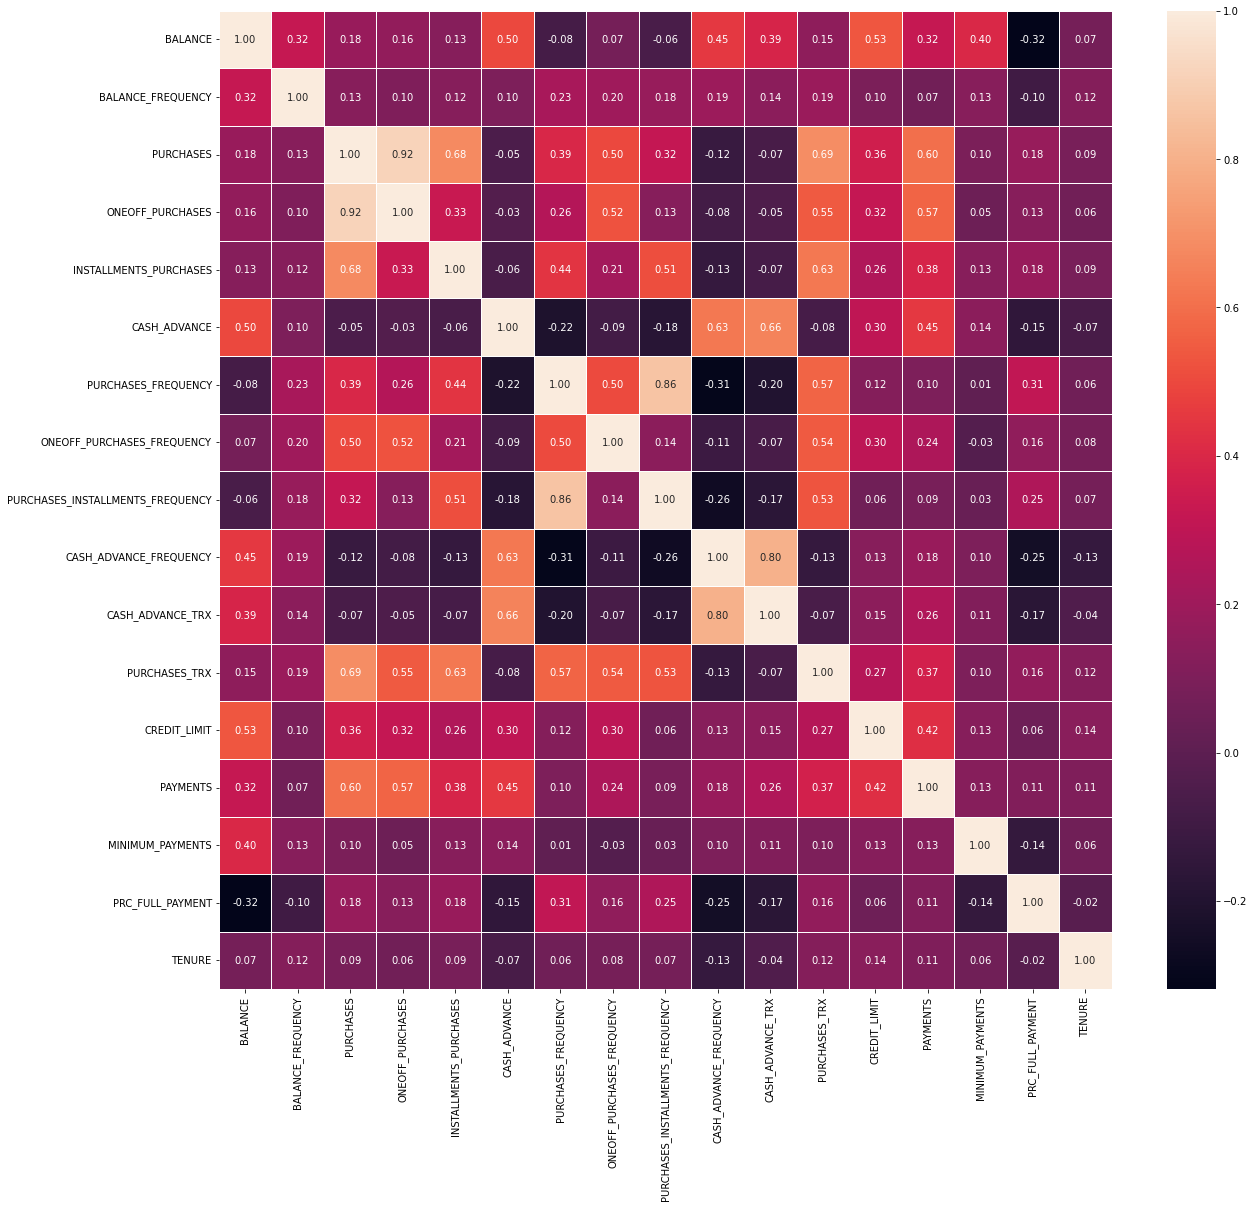

In [14]:
fig, ax = plt.subplots(figsize=(20, 18))
cm = sns.heatmap(df.corr(), linewidths = .5, annot=True, fmt='.2f')

## Data Preprocessing

**Drop Features**

In [15]:
df2 = df.drop(['CUST_ID', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
               'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_FREQUENCY',
               'CASH_ADVANCE_FREQUENCY'], axis=1, inplace=False)
df2.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,95.40,0.00,95.4,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.00,0.00,0.0,6442.945483,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,773.17,773.17,0.0,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,1499.00,1499.00,0.0,205.788017,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,16.00,16.00,0.0,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
df2.shape

(8950, 12)

**Standardize Data**

Melakukan penskalaan data, agar diperoleh kesamaan dalam satuan

In [17]:
sclr = StandardScaler()
df_sclr = sclr.fit_transform(df2)

**Normalize Data**

Melakukan normalisasi data (optional)

In [18]:
df_norm = normalize(df_sclr)

In [19]:
feat_cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
             'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT',
             'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

X = pd.DataFrame(df_norm, columns=feat_cols)
X.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.398652,-0.231407,-0.194392,-0.190114,-0.254218,-0.259275,-0.278480,-0.523036,-0.288090,-0.164692,-0.286223,0.196431
1,0.253145,-0.151043,-0.114816,-0.146225,0.838155,0.035408,-0.190365,0.221530,0.263336,0.031363,0.075345,0.116021
2,0.306287,-0.073753,0.074589,-0.311384,-0.319748,-0.326107,-0.074679,0.565878,-0.262906,-0.063906,-0.360002,0.247065
3,0.030396,0.143661,0.338133,-0.281417,-0.228224,-0.204006,-0.341460,0.511418,-0.370633,-0.141339,-0.325356,0.223288
4,-0.212773,-0.274028,-0.205964,-0.269588,-0.276828,-0.282334,-0.327107,-0.536956,-0.216089,-0.152573,-0.311679,0.213902


**Cluster Defining**

In [20]:
inertia = []

for i in range(1, 10):
    model = KMeans(n_clusters=i, random_state=2)
    model.fit(X)
    inertia.append(model.inertia_)
    
df_inertia = pd.DataFrame({'Inertia': inertia}, index=[i for i in range(1, 10)])
df_inertia

,Inertia
1,8423.616878
2,6609.543972
3,5470.211927
4,4756.211384
5,4080.680268
6,3700.091966
7,3450.881252
8,3248.202732
9,3090.097501


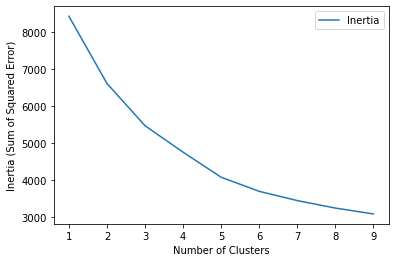

In [21]:
df_inertia.plot(kind='line')
plt.ylabel('Inertia (Sum of Squared Error)')
plt.xlabel('Number of Clusters')
plt.show()

Nilai inertia menunjukkan bahwa k cluster yang dapat dipilih yakni 3-5 cluster. Dalam memilih banyaknya cluster harus mempertimbangkan computation cost, sehingga dipilih banyaknya k cluster yaitu 3 cluster

## Model Defining

**K-Means**

In [22]:
modelKM = KMeans(n_clusters=3, random_state=2)

**Agglomerative Clustering**

In [23]:
modelAgg = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")

## Model Training

**K-Means**

In [24]:
modelKM.fit(X.iloc[:, 0:12])

KMeans(n_clusters=3, random_state=2)

**Agglomerative Clustering**

In [25]:
modelAgg.fit(X.iloc[:, 0:12])

AgglomerativeClustering(n_clusters=3)

**Predict**

In [26]:
X['CLUSTER_KM'] = modelKM.predict(X.iloc[:, 0:12])
X['CLUSTER_AGG'] = modelAgg.fit_predict(X.iloc[:, 0:12])

In [27]:
df2['CLUSTER_KM'] = X['CLUSTER_KM']
df2['CLUSTER_AGG'] = X['CLUSTER_AGG']

## Model Evaluation

In [28]:
sil_km = silhouette_score(X.iloc[:, 0:12], X['CLUSTER_KM'])
db_km = davies_bouldin_score(X.iloc[:, 0:12], X['CLUSTER_KM'])
# ch_km = calinski_harabasz_score(df2, df2['CLUSTER_KM'])

sil_agg = silhouette_score(X.iloc[:, 0:12], X['CLUSTER_AGG'])
db_agg = davies_bouldin_score(X.iloc[:, 0:12], X['CLUSTER_AGG'])

In [29]:
modelSlc = pd.DataFrame({'K-Means': [sil_km, db_km],
                         'Agglomerative': [sil_agg, db_agg]}, 
                        index=['Silhouette Score', 'Davies-Bouldin'])
modelSlc

,K-Means,Agglomerative
Silhouette Score,0.248260,0.190371
Davies-Bouldin,1.622981,1.952470


Melalui evaluasi model yang telah dilakukan, diperoleh hasil yang relatif tidak jauh antara metode KMeans dengan Agglomerative Clustering. Namun, dalam segi kecepatan komputasi KMeans jauh lebih baik.

C:\Users\death\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frekuensi')

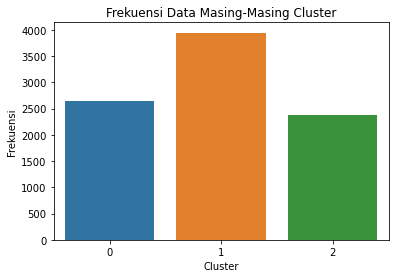

In [30]:
x = X['CLUSTER_KM'].value_counts().index
y = X['CLUSTER_KM'].value_counts().values

sns.barplot(x, y)
plt.title("Frekuensi Data Masing-masing Cluster")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")

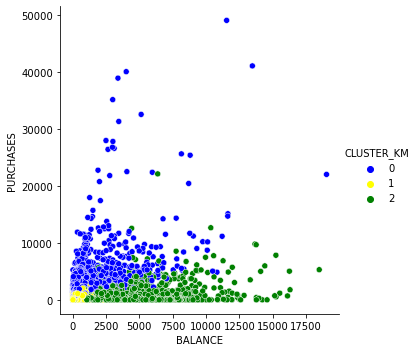

In [31]:
sns.relplot(x='BALANCE', y='PURCHASES', data=df2, hue='CLUSTER_KM', palette=['blue', 'yellow', 'green'])

Diketahui bahwa cluster 0 merupakan customer yang banyak melakukan pembelian, sedangkan cluster 1 merupakan customer yang memiliki saldo rendah dan tidak banyak melakukan pembelian. Cluster 2 merupakan customer yang memiliki saldo tinggi namun tidak banyak melakukan pembelian.

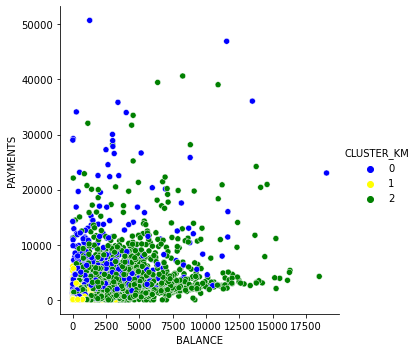

In [32]:
sns.relplot(x='BALANCE', y='PAYMENTS', data=df2, hue='CLUSTER_KM', palette=['blue', 'yellow', 'green'])

Diketahui bahwa cluster 0 & 2 merupakan customer yang memiliki saldo tinggi dan banyak melakukan pembayaran. Sedangkan cluster 1 merupakan customer yang memiliki saldo rendah dan tidak banyak melakukan pembayaran.

## Model Inference

In [33]:
X_inf = {'BALANCE': [100, 46000], 'PURCHASES':[12000, 14000], 'ONEOFF_PURCHASES': [3, 9], 
         'INSTALLMENTS_PURCHASES': [0, 0], 'CASH_ADVANCE': [0, 2], 'CASH_ADVANCE_TRX': [0, 0], 
         'PURCHASES_TRX': [0, 15], 'CREDIT_LIMIT': [200, 50000], 'PAYMENTS': [20, 20000], 
         'MINIMUM_PAYMENTS': [20, 20000], 'PRC_FULL_PAYMENT': [0.2, 0.8], 'TENURE':[12, 12]}

X_inf = pd.DataFrame(X_inf)
X_inf.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,100,12000,3,0,0,0,0,200,20,20,0.2,12
1,46000,14000,9,0,2,0,15,50000,20000,20000,0.8,12


In [34]:
sclr_inf = sclr.transform(X_inf)
norm_inf = normalize(X_inf)

In [35]:
feat_cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
             'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT',
             'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

X_inf = pd.DataFrame(norm_inf, columns=feat_cols)
X_inf.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.008332,0.999823,0.00025,0.0,0.000000,0.0,0.0000,0.016664,0.001666,0.001666,0.000017,0.00100
1,0.614043,0.186883,0.00012,0.0,0.000027,0.0,0.0002,0.667438,0.266975,0.266975,0.000011,0.00016


In [36]:
modelKM.predict(X_inf)

array([0, 2])

## Conclusions

Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut:
* Terdapat 18 feature yang menjadi kriteria masing-masing customer, kemudian dipilih 12 feature yang saling independen untuk pembentukan cluster.
* Perbandingan antara metode KMeans dengan Agglomerative Clustering menunjukkan bahwa hasil evaluasi model memiliki nilai yang relatif sama, namun dalam segi kecepatan komputasi model KMeans lebih unggul.
* Terdapat 3 cluster dengan ciri-ciri yaitu cluster 0 merupakan costumer dengan saldo dan pengeluaran yang banyak, cluster 1 merupakan costumer dengan saldo dan pengeluaran yang sedikit, serta cluster 2 merupakan costumer yang memiliki saldo tinggi dan pengeluaran yang rendah.


---

In [ ]:
pickle.dump(modelKM, open('modelClustering.pkl','wb'))

In [ ]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(sclr, file)